<h2> Taxi Tip Prediction with Snap ML </h2>

We will use a real dataset to train a Decision Tree Regressor model. The dataset includes information about taxi tip and was fetched from the NYC Taxi and Limousine Commission (TLC).

Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient multi-threaded CPU/GPU implementations of linear models and tree-based models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Uncomment to download the dataset
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/ds/yellow_tripdata_2019-06.csv -o taxi.csv

In [2]:
data = pd.read_csv('taxi.csv')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.00,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.00,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.40,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.80,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935999,2,2019-06-17 23:27:54,2019-06-17 23:37:37,1.0,3.36,1.0,N,75.0,161.0,1.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5
3936000,2,2019-06-17 23:41:25,2019-06-17 23:48:50,1.0,1.64,1.0,N,161.0,234.0,1.0,8.0,0.5,0.5,4.00,0.0,0.3,15.80,2.5
3936001,2,2019-06-17 23:47:39,2019-06-17 23:54:02,5.0,2.00,1.0,N,211.0,186.0,2.0,7.5,0.5,0.5,0.00,0.0,0.3,11.30,2.5
3936002,2,2019-06-17 23:55:44,2019-06-18 00:06:50,5.0,3.06,1.0,N,164.0,236.0,2.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5


In [ ]:
# Given dataset has almost 4 million samples
# If you run into storage issues, uncomment the following code to use only the first 150,000 samples

#data = data.head(150000)
#data

In [3]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,3.936004e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06,3.936003e+06
mean,1.640733e+00,1.570112e+00,3.095537e+00,1.058665e+00,1.628665e+02,1.612532e+02,1.291269e+00,1.351268e+01,1.162435e+00,4.951916e-01,2.251814e+00,4.071124e-01,2.986211e-01,1.957001e+01,2.274282e+00
std,5.020742e-01,1.214708e+00,2.351466e+01,7.215995e-01,6.636449e+01,7.048365e+01,4.800985e-01,1.257028e+01,1.275248e+00,5.969404e-02,2.858797e+00,1.818862e+00,2.753095e-02,1.541216e+01,7.285723e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.050000e+02,-2.650000e+01,-5.000000e-01,-8.888000e+01,-1.900000e+01,-3.000000e-01,-3.058000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.160000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.100000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,4.597722e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.004000e+03,1.850000e+01,3.080000e+01,3.569000e+02,8.230000e+02,3.000000e-01,3.007300e+03,2.750000e+00


In [4]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Our Decision Tree Regressor model can only take numeric data types as input. 

Let's clean up the dataset for training and convert the non-numeric data types to numeric.

In [5]:
# Consider samples where the tip amount is non-zero, since zero values could indicate cash payment
ds = data[data['tip_amount'] > 0]

# Removing outliers, namely where tip is greater than fare
ds = ds[(ds['tip_amount'] <= ds['fare_amount'])]

# Removing extremely large fare samples
ds = ds[((ds['fare_amount'] > 2) & (ds['fare_amount'] < 200))]

# Removing variables that include our target variable (tip + fare = total)
ds = ds.drop('total_amount', axis=1)

ds

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,0.0


In [6]:
ds.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
count,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06,2.712718e+06
mean,1.642473e+00,1.560089e+00,3.102797e+00,1.054239e+00,1.647203e+02,1.630739e+02,1.000055e+00,1.356470e+01,1.202217e+00,4.975662e-01,3.239240e+00,4.352156e-01,2.999562e-01,2.365314e+00
std,5.017369e-01,1.212435e+00,3.924755e+00,3.807304e-01,6.576448e+01,6.981922e+01,8.819228e-03,1.182372e+01,1.283145e+00,3.948208e-02,2.694930e+00,1.732297e+00,3.624390e-03,5.644079e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.170000e+00,-2.650000e+01,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.160000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,3.560000e+00,0.000000e+00,3.000000e-01,2.500000e+00
max,4.000000e+00,9.000000e+00,1.010000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.995000e+02,1.850000e+01,3.080000e+01,1.300000e+02,8.000000e+01,3.000000e-01,2.750000e+00


Since our original dataset 'data' has been cleaned and extracted to 'ds', we will delete it as it occupies a lot of runtime memory.

In [7]:
import gc

del data
gc.collect()

4

Pickup and dropoff date-time pairs have to be converted into numeric values.

In [8]:
ds['tpep_dropoff_datetime'] = pd.to_datetime(ds['tpep_dropoff_datetime'])
ds['tpep_pickup_datetime'] = pd.to_datetime(ds['tpep_pickup_datetime'])
ds.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5


In [9]:
ds['pickup_hour'] = ds['tpep_pickup_datetime'].dt.hour
ds['dropoff_hour'] = ds['tpep_dropoff_datetime'].dt.hour
ds.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5,0,0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5,0,0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5,0,1
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5,0,1
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5,0,0


In [10]:
ds['pickup_day'] = ds['tpep_pickup_datetime'].dt.weekday
ds['dropoff_day'] = ds['tpep_dropoff_datetime'].dt.weekday
ds.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,3.0,0.5,2.65,0.0,0.3,2.5,0,0,5,5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,3.0,0.5,1.00,0.0,0.3,2.5,0,0,5,5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,3.0,0.5,1.00,0.0,0.3,2.5,0,1,5,5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,3.0,0.5,7.05,0.0,0.3,2.5,0,1,5,5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,0.5,2.96,0.0,0.3,2.5,0,0,5,5


In [11]:
ds['trip_duration'] = (ds['tpep_dropoff_datetime'] - ds['tpep_pickup_datetime']).astype('timedelta64[s]')
ds.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_duration
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,0.5,2.65,0.0,0.3,2.5,0,0,5,5,0 days 00:12:17
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,0,5,5,0 days 00:10:52
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,1,5,5,0 days 00:08:08
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,0.5,7.05,0.0,0.3,2.5,0,1,5,5,0 days 00:34:01
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,2.96,0.0,0.3,2.5,0,0,5,5,0 days 00:14:18


Since all relevant data from the non-numeric columns for pickup and dropoff have been extracted, we'll drop these columns.

In [12]:
ds = ds.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
ds.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_duration
4,1,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5,0,0,5,5,0 days 00:12:17
5,1,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5,0,0,5,5,0 days 00:10:52
7,1,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5,0,1,5,5,0 days 00:08:08
9,1,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5,0,1,5,5,0 days 00:34:01
10,2,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5,0,0,5,5,0 days 00:14:18


In [13]:
ds.dtypes

VendorID                          int64
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
congestion_surcharge            float64
pickup_hour                       int32
dropoff_hour                      int32
pickup_day                        int32
dropoff_day                       int32
trip_duration            timedelta64[s]
dtype: object

'store_and_fwd_flag' is still non-numeric, so let's check that out.

In [14]:
ds['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

These can be encoded with labels to obtain numeric values. 

In [15]:
from sklearn.preprocessing import LabelEncoder

ds['store_and_fwd_flag'] = LabelEncoder().fit_transform(ds['store_and_fwd_flag'])
ds['store_and_fwd_flag'].unique()

array([0, 1])

We are ready to calculate correlation values for picking our model's traiing features.

<Axes: >

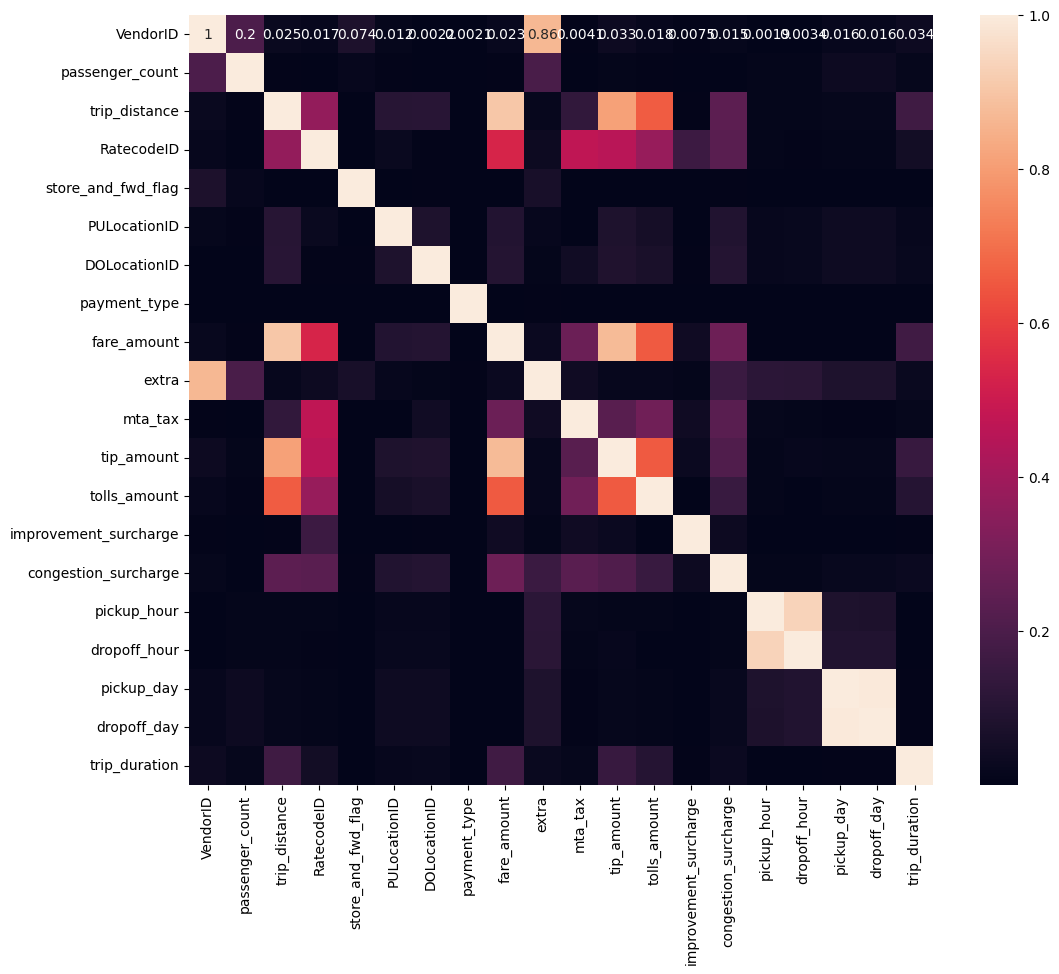

In [16]:
from seaborn import heatmap

plt.figure(figsize=(12,10))
heatmap(ds.corr().abs(), annot=True)

In [17]:
# Training features variable
X = np.array(ds[['trip_distance', 'RatecodeID', 'fare_amount', 'mta_tax', 'tolls_amount', 'congestion_surcharge']])
X

array([[ 1.7 ,  1.  ,  9.5 ,  0.5 ,  0.  ,  2.5 ],
       [ 1.6 ,  1.  ,  9.5 ,  0.5 ,  0.  ,  2.5 ],
       [ 1.2 ,  1.  ,  7.5 ,  0.5 ,  0.  ,  2.5 ],
       ...,
       [ 3.  ,  1.  , 11.  ,  0.5 ,  0.  ,  2.5 ],
       [ 2.73,  1.  , 11.5 ,  0.5 ,  0.  ,  0.  ],
       [ 1.64,  1.  ,  8.  ,  0.5 ,  0.  ,  2.5 ]])

In [18]:
# Target variable
Y = np.array(ds['tip_amount'].astype('float32'))
Y[:5]

array([2.65, 1.  , 1.  , 7.05, 2.96], dtype=float32)

In [19]:
# Normalization
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[-0.35742292, -0.14245933, -0.34377495,  0.06164416, -0.25123616,
         0.23863218],
       [-0.38290222, -0.14245933, -0.34377495,  0.06164416, -0.25123616,
         0.23863218],
       [-0.48481943, -0.14245933, -0.51292654,  0.06164416, -0.25123616,
         0.23863218],
       ...,
       [-0.02619202, -0.14245933, -0.21691125,  0.06164416, -0.25123616,
         0.23863218],
       [-0.09498613, -0.14245933, -0.17462335,  0.06164416, -0.25123616,
        -4.19078942],
       [-0.3727105 , -0.14245933, -0.47063865,  0.06164416, -0.25123616,
         0.23863218]])

In [20]:
X.shape, Y.shape

((2712718, 6), (2712718,))

We don't need the cleaned dataset 'ds' anymore, so we will delete it to conserve space.

In [21]:
del ds
gc.collect()

0

In [22]:
# Train-test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((2170174, 6), (2170174,), (542544, 6), (542544,))

In [23]:
# Training 
from snapml import DecisionTreeRegressor
from time import time

tree = DecisionTreeRegressor(max_depth=6, n_jobs=4, random_state=45)
starttime = time()
tree.fit(xtrain, ytrain)
training_time = time() - starttime
training_time

0.6364319324493408

In [24]:
# Prediction
yhat = tree.predict(xtest)

In [25]:
# Validation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mean_squared_error(ytest, yhat)

1.620638778316277

In [26]:
r2_score(ytest, yhat)

0.7766131453975191

In [27]:
mean_absolute_percentage_error(ytest, yhat)

0.7809363660535602